In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hist
import mplhep as hep
from utils import data_prep
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [76]:
df = data_prep.load_and_prep_data("data/ncdatachallenge-2021-v1.csv")

In [25]:
for colname in df.columns:
    print(colname, df[colname].dtype, np.count_nonzero(df[colname].isnull()))

bmi float64 0
age int64 0
country category 0
been_pregnant_before category 0
education category 0
sleeping_pattern category 0
n_cycles_trying int64 0
outcome object 0
dedication float64 0
average_cycle_length float64 6
cycle_length_std float64 25
regular_cycle bool 0
intercourse_frequency float64 0
pregnant bool 0


In [80]:
def plot_col(df, colname):
    col = df[colname]
    fig = plt.figure()
    ax = fig.add_subplot()
    hall = hist.Hist(hist.axis.StrCategory(col.cat.categories)).fill(col)
    hpreg = hist.Hist(hist.axis.StrCategory(col.cat.categories)).fill(col[df["outcome"] == "pregnant"])
    ax.tick_params(labelrotation=90)
    hall.plot(ax=ax, histtype="fill", color="#e0ecf4", label="All participants", linewidth=1, edgecolor='#1f4056')
    hpreg.plot(ax=ax, histtype="fill", color="#8856a7", label="Pregnant", linewidth=1, edgecolor='#22152a')
    plt.legend()
    fig.suptitle(colname)
    ax.set_xlabel("")
    return fig

In [87]:
def merge_categories(df, catname, to_keep, new_cat):
    df[catname] = df[catname].cat.set_categories(to_keep+[new_cat])
    df.loc[df[catname].isna(), catname] = new_cat

Text(0, 0.5, 'Number of particpants')

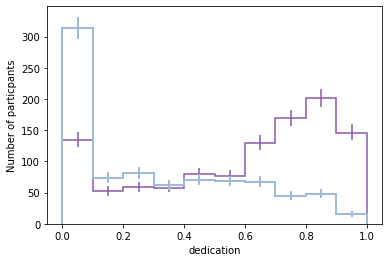

In [64]:
hdedpreg = hist.Hist(hist.axis.Regular(10, 0, 1.0, name="dedication")).fill(df[df["outcome"] == "pregnant"]["dedication"])
hdednon = hist.Hist(hist.axis.Regular(10, 0, 1.0, name="dedication")).fill(df[df["outcome"] != "pregnant"]["dedication"])
hdedpreg.plot(label="Pregnant", color='#8856a7')
hdednon.plot(label="Not pregnant", color="#9ebcda", linewidth=2)
plt.ylabel("Number of particpants")

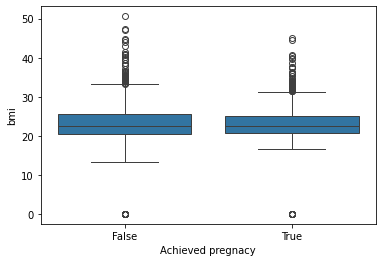

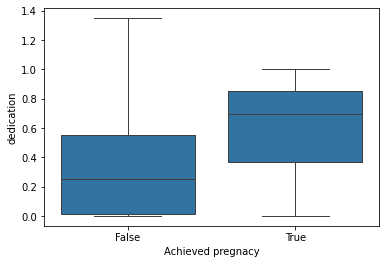

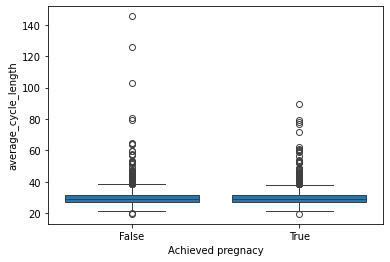

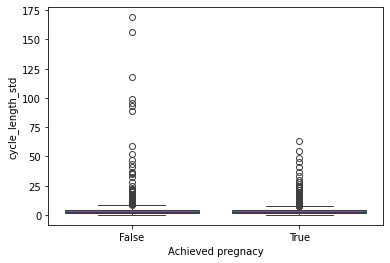

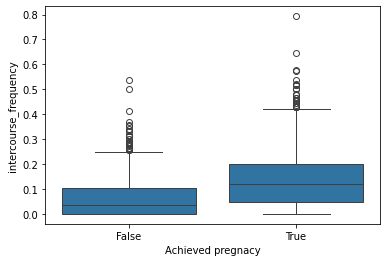

In [37]:
for colname in df.columns[df.dtypes == float]:
    fig = plt.figure()
    ax = fig.add_subplot()
    sns.boxplot(data=df, x=df["pregnant"], y=df[colname], ax=ax)
    ax.set_xlabel("Achieved pregnacy")

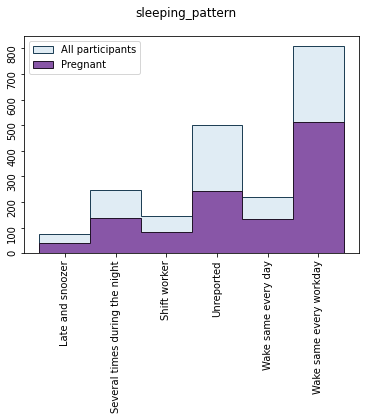

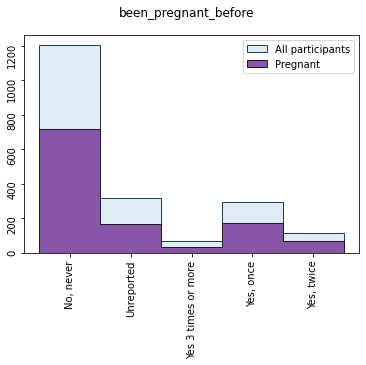

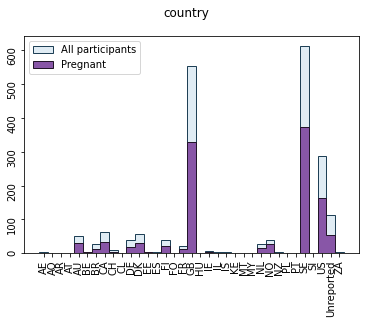

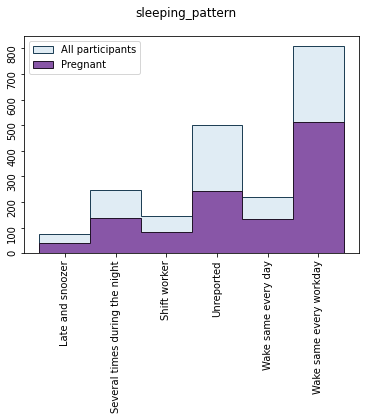

In [81]:
for colname in ["sleeping_pattern", "been_pregnant_before", "country", "sleeping_pattern"]:
    plot_col(df, colname)

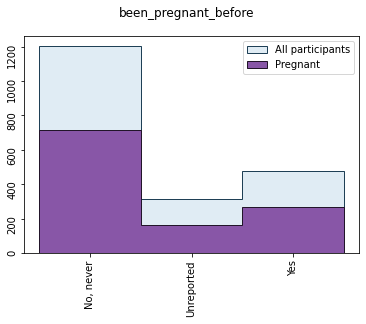

In [89]:
merge_categories(df, "been_pregnant_before", ["No, never", "Unreported",], "Yes")
fig = plot_col(df, "been_pregnant_before")

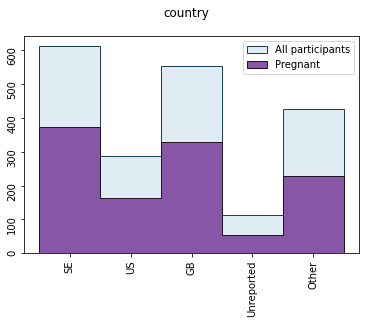

In [90]:
merge_categories(df, "country", ["SE", "US", "GB", "Unreported",], "Other")
fig = plot_col(df, "country")

/var/folders/r2/5d99yt5j23s3c5nzcgbv0yvr0000gn/T/ipykernel_12559/880883574.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(["n_cycles_trying", "pregnant"], axis=1).corr())


<Axes: >

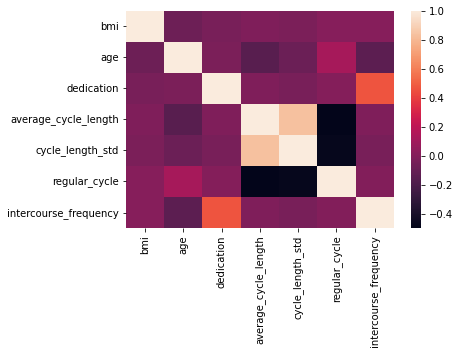

In [95]:
sns.heatmap(df.drop(["n_cycles_trying", "pregnant"], axis=1).corr())

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x293148430>, cbar=<matplotlib.colorbar.Colorbar object at 0x293158c40>, text=[])

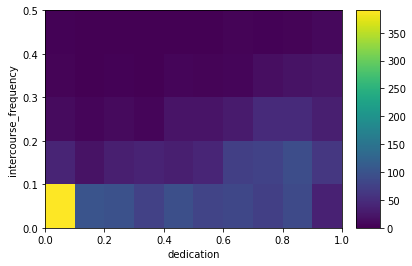

In [106]:
h2d = hist.Hist(hist.axis.Regular(10, 0, 1., name="dedication"), hist.axis.Regular(5, 0, 0.5, name="intercourse_frequency")).fill(df["dedication"], df["intercourse_frequency"])
h2d.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x2934241f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x293434f40>, text=[])

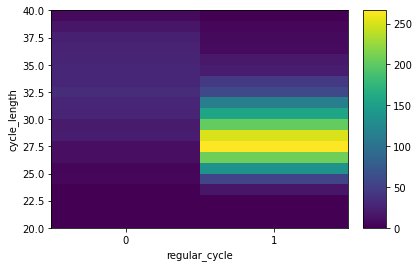

In [112]:
h2d = hist.Hist(hist.axis.Boolean(name="regular_cycle"), hist.axis.Regular(20, 20, 40, name="cycle_length")).fill(df["regular_cycle"], df["average_cycle_length"])
h2d.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x2936eba90>, cbar=<matplotlib.colorbar.Colorbar object at 0x2936ebee0>, text=[])

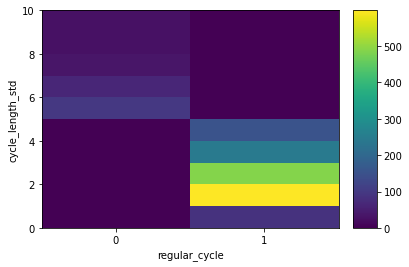

In [118]:
h2d = hist.Hist(hist.axis.Boolean(name="regular_cycle"), hist.axis.Regular(10, 0, 10, name="cycle_length_std")).fill(df["regular_cycle"], df["cycle_length_std"])
h2d.plot()

In [120]:
df[df["cycle_length_std"] > df["average_cycle_length"]]

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
207,22.229062,31,SE,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,42.928571,46.778470,False,0.000000,False
1095,23.030045,34,SE,"No, never",High school,Unreported,4,not_pregnant,0.000000,57.875000,88.969397,False,0.000000,False
1227,20.415225,32,GB,Unreported,PhD,Shift worker,1,not_pregnant,0.000000,63.750000,93.077157,False,0.000000,False
1300,20.936639,31,GB,"No, never",University,Wake same every day,6,not_pregnant,0.858369,80.333333,117.825082,False,0.081545,False
1521,23.888441,31,Other,"No, never",University,Unreported,1,not_pregnant,0.444444,145.500000,168.998521,False,0.037037,False
1555,20.195578,32,SE,"No, never",University,Unreported,1,not_pregnant,0.000000,126.000000,156.751396,False,0.000000,False
1586,27.290694,30,US,Yes,University,Unreported,1,not_pregnant,0.266667,79.500000,95.671312,False,0.000000,False
1993,21.453574,30,Other,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,38.600000,41.126634,False,0.000000,False


In [123]:
df[df["average_cycle_length"] > 70]

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
383,26.524913,27,SE,"No, never",University,Wake same every day,1,pregnant,0.650000,76.800000,55.033626,False,0.066667,True
424,20.195092,30,SE,"No, never",University,Wake same every workday,1,pregnant,0.888889,89.333333,62.962952,False,0.013889,True
631,20.077335,28,SE,"No, never",University,Wake same every workday,1,pregnant,0.788462,71.500000,36.382230,False,0.153846,True
980,20.571429,29,Other,"No, never",University,Wake same every workday,2,pregnant,0.970000,79.250000,28.335784,False,0.190000,True
1126,23.808690,27,SE,"No, never",University,Wake same every day,2,not_pregnant,0.093750,102.666667,98.913430,False,0.024306,False
1300,20.936639,31,GB,"No, never",University,Wake same every day,6,not_pregnant,0.858369,80.333333,117.825082,False,0.081545,False
1521,23.888441,31,Other,"No, never",University,Unreported,1,not_pregnant,0.444444,145.500000,168.998521,False,0.037037,False
1555,20.195578,32,SE,"No, never",University,Unreported,1,not_pregnant,0.000000,126.000000,156.751396,False,0.000000,False
1586,27.290694,30,US,Yes,University,Unreported,1,not_pregnant,0.266667,79.500000,95.671312,False,0.000000,False
1724,22.862369,25,SE,"No, never",University,Unreported,2,pregnant,0.170732,78.250000,45.375287,False,0.207317,True
